In [78]:
import os
fileList = os.listdir("C:\\Users\\Sarvotham\\Desktop\\PGP-ML\\Capstone\\Adobe_Text")

In [79]:
dict_1 = {}

In [80]:
import string

In [82]:
for i in range(0,len(fileList)):
    #print(i)
    filepath = "C:\\Users\\Sarvotham\\Desktop\\PGP-ML\\Capstone\\Adobe_Text\\"+fileList[i]
    #print(filepath)
    myfile = open(filepath, "rt")
    text = myfile.read()
    f1 = text.replace('\n',' ')
    lowers = f1.lower()
    no_punctuation = lowers.translate(str.maketrans('', '', string.punctuation))
    dict_1[fileList[i]] = no_punctuation

In [83]:
import pandas as pd
sci_df = pd.DataFrame.from_dict(dict_1, orient='index', columns = ['Content'])

In [84]:
sci_df = sci_df.reset_index(drop=False)

In [85]:
sci_df.rename(columns={ sci_df.columns[0]: "Filename" },inplace=True)

In [88]:
sci_df.head()

,Filename,Content
0,10022_2008_Judgement_03-Dec-2018.txt,1 reportable in the supreme court of india ...
1,10099_2008_Judgement_12-Feb-2019.txt,reportable in the supreme court of india cri...
2,10102_2017_Judgement_26-Mar-2019.txt,reportable in the supreme court of india civ...
3,10136_2008_Judgement_01-Feb-2019.txt,reportable in the supreme court of india civ...
4,1013_2018_Judgement_11-Mar-2019.txt,reportable in the supreme court of india civ...


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df=1, stop_words='english')
tfidf_matrix = tf.fit_transform(sci_df['Content'])

In [90]:
tfidf_matrix.shape

(626, 50693)

In [91]:
tf.get_feature_names

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)>

In [101]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [93]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


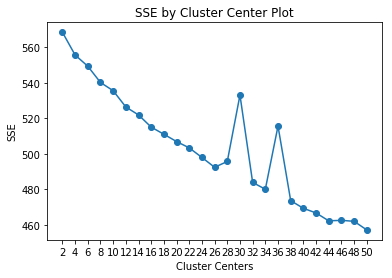

In [97]:
find_optimal_clusters(tfidf_matrix, 50)

In [98]:
clusters = MiniBatchKMeans(n_clusters=26, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf_matrix)

In [104]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=500, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

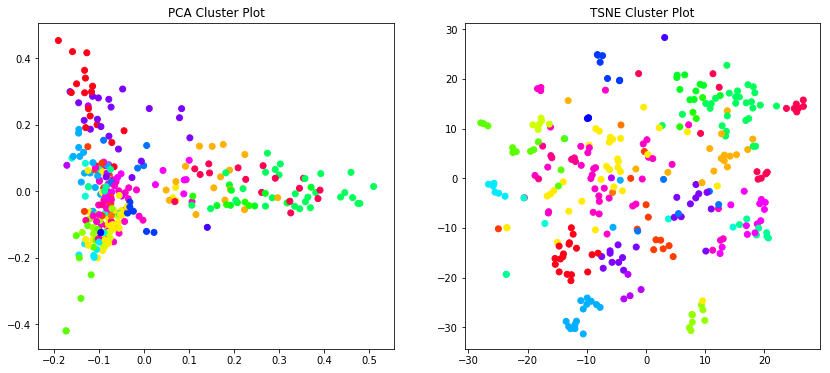

In [105]:
plot_tsne_pca(tfidf_matrix, clusters)

In [106]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [108]:
get_top_keywords(tfidf_matrix, clusters, tf.get_feature_names(), 10)


Cluster 0
auction,kanals,tribunal,public,allocation,property,land,allotment,academy,wakf

Cluster 1
appeal,wages,reinstatement,labour,industrial,order,award,appellant,court,respondent

Cluster 2
assessees,100,expansion,board,profits,gains,assessee,assessment,deduction,80ic

Cluster 3
magistrate,investigation,police,complainant,respondent,section,accused,complaint,criminal,court

Cluster 4
high,tax,state,provisions,order,government,shall,court,section,act

Cluster 5
giriyama,questions,answers,answer,tcc,court,candidate,examination,marks,candidates

Cluster 6
section,act,contract,court,arbitral,award,clause,agreement,arbitrator,arbitration

Cluster 7
state,territory,castes,reservation,posts,tribes,promotion,union,scheduled,seniority

Cluster 8
imprisonment,deceased,prosecution,conviction,evidence,accused,appellant,section,appellantaccused,ipc

Cluster 9
conviction,bai,declaration,accused,ipc,court,evidence,appellant,dying,deceased

Cluster 10
trial,offence,pw1,prosecution,deceased,ipc,s